# Analysis of the electricity consumption - EU6/US

All the data was provided directly by official databases.

For the US: https://www.eia.gov/electricity
For the EU6:https://ec.europa.eu/eurostat/databrowser/explore/all

Further calculations were required for the U.S. data. Data for electricity consumption are only given separately for each source used to generate electricity. I have included only the gas and coal sources, as additional sources do not provide further insight.

"EU6" is defined as the 6 countries that founded the EU originally in 1957.


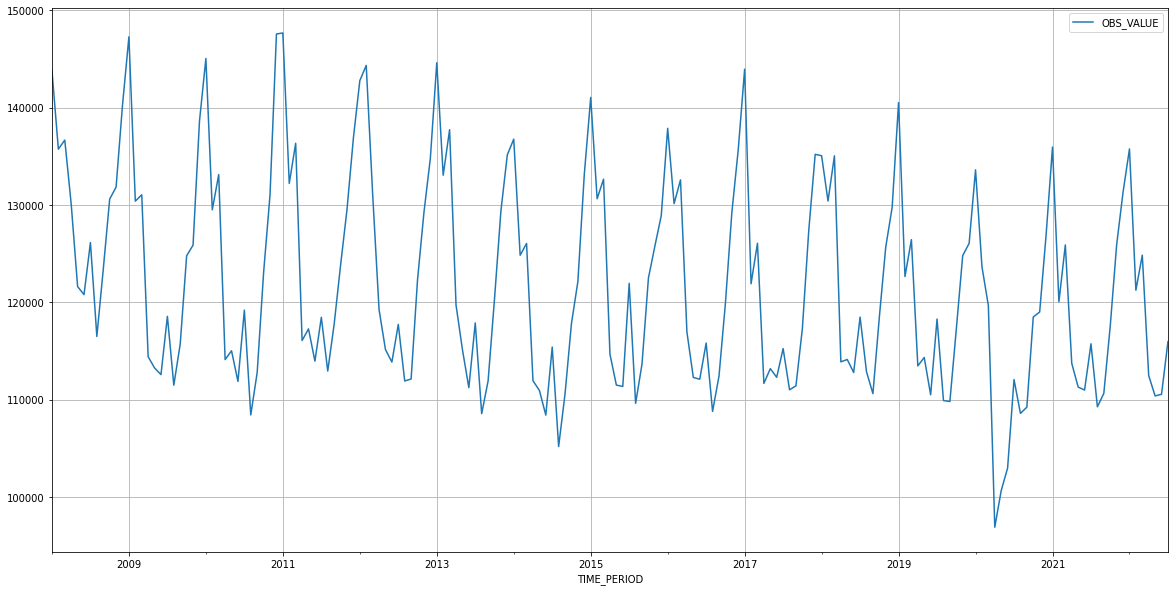

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime


data = pd.read_csv("/Users/xxx/Downloads/ei_isen_m__custom_4619346_linear.csv", parse_dates=["TIME_PERIOD"])
data.index = data["geo"]

df_BE = data.filter(like="BE", axis=0)[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')  # Splitting the DataFrame in smaller DataFrames
df_DE = data.filter(like="DE", axis=0)[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
df_FR = data.filter(like="FR", axis=0)[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
df_IT = data.filter(like="IT", axis=0)[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
df_LU = data.filter(like="LU", axis=0)[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
df_NL = data.filter(like="NL", axis=0)[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')

countries = [df_BE, df_DE, df_FR, df_IT, df_LU, df_NL]

# pd.concat creates one dataframe but does not sum values up, that have the same index value
df_all = pd.concat(countries, axis=0)
# grouping all rows by their same value - in this case the same month - then summing all value of one month
df_all = df_all.groupby('TIME_PERIOD').sum()

df_all[:'2022-07-31'].plot(figsize=(20, 10), grid=True);  # plotting the DataFrame for the EU6


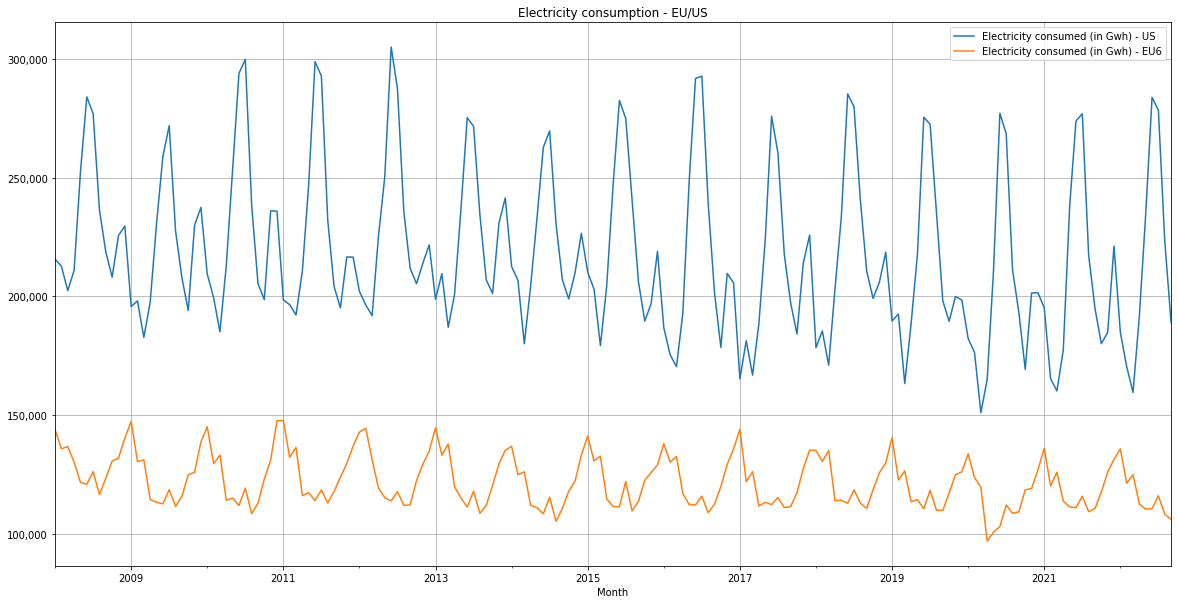

In [2]:
data_us = pd.read_excel('/Users/xxx/Documents/Daten/US Electricity consumption - gas and coal only.xlsx')


# excluding values that are not available in the US data
data_us.index = df_all[:'2022-09-30'].index
# adding the values of EU6 to the US DataFrame
data_us["Electricity consumed (in Gwh) - EU6"] = df_all["OBS_VALUE"]
# Removing the old date column from the US data as there was a problem transforming it to datetime aswell
data_us.drop(columns=['date'])


# storing the figure created by pandas in ax and renaming the columns of the dataframe - then plotting the dataframe + formatting
ax =data_us.rename(columns={"Electricity consumed (in Gwh)": "Electricity consumed (in Gwh) - US"}).plot(figsize=(20,10), grid=True, title='Electricity consumption - EU/US')
ax.set_xlabel('Month')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));


matplotlib.pyplot.savefig("Electricity consumption EU-US.png", transparent=False, facecolor='w')
